In [1]:
import numpy as np
import pandas as pd
import SimpleITK as sitk

from ipywidgets import interact, fixed
from itkwidgets import view

import os, sys
import gui
%matplotlib notebook

In [4]:
#samples = ['074_23452969', '162_33687560', '238_39491806', '441_39939586', '629_40336295']
samples = ['004_11453440', '009_12136166', '010_12281624']

#### The comparison of registration results among origin liver ct phase images and those among cropped liver ct phase images
#### 원본 간암 phase간 정합 영상과 간 마스크가 존재하는 slice만 잘라내기한 phase 영상 간의 정합영상을 비교해 보자 

<IPython.core.display.Javascript object>


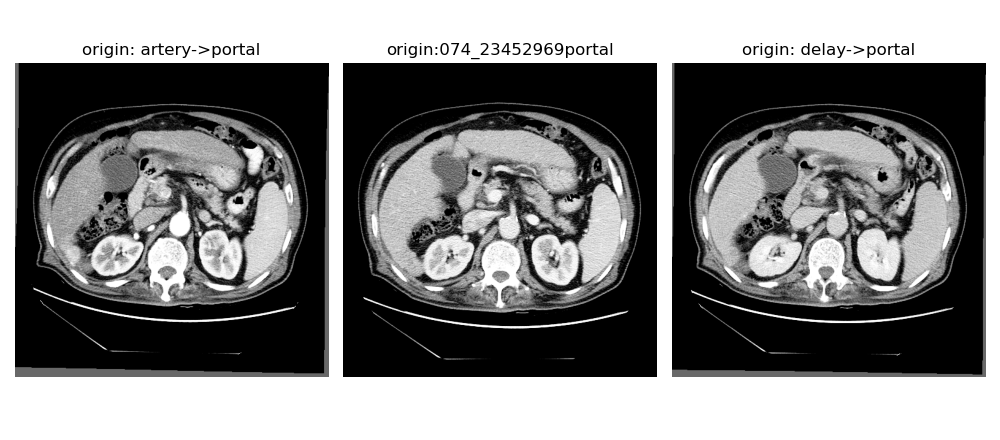

<IPython.core.display.Javascript object>


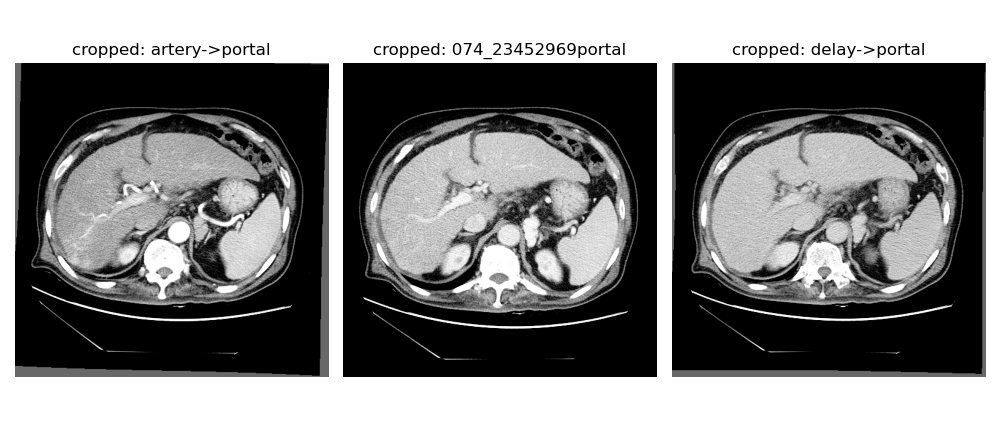

<IPython.core.display.Javascript object>


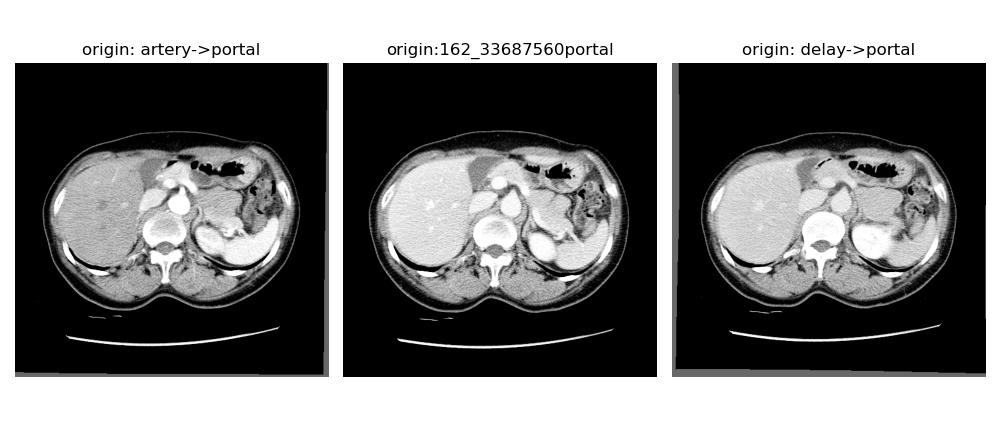

<IPython.core.display.Javascript object>


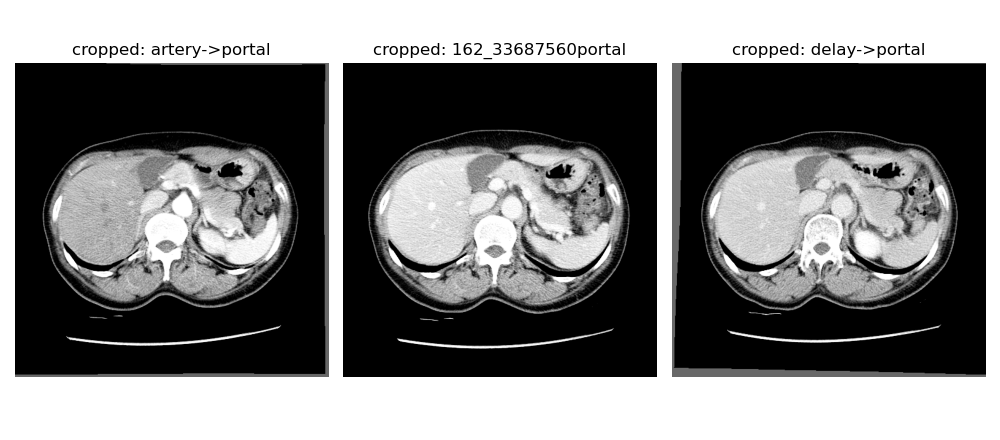

<IPython.core.display.Javascript object>


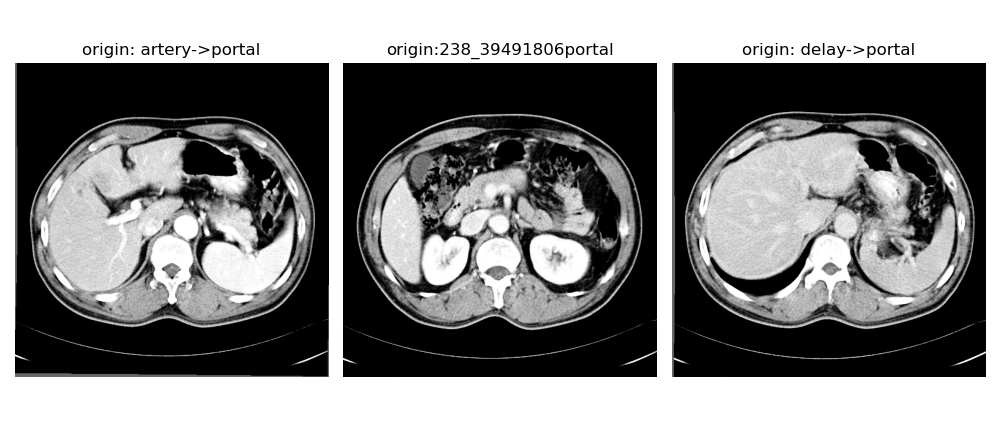

<IPython.core.display.Javascript object>


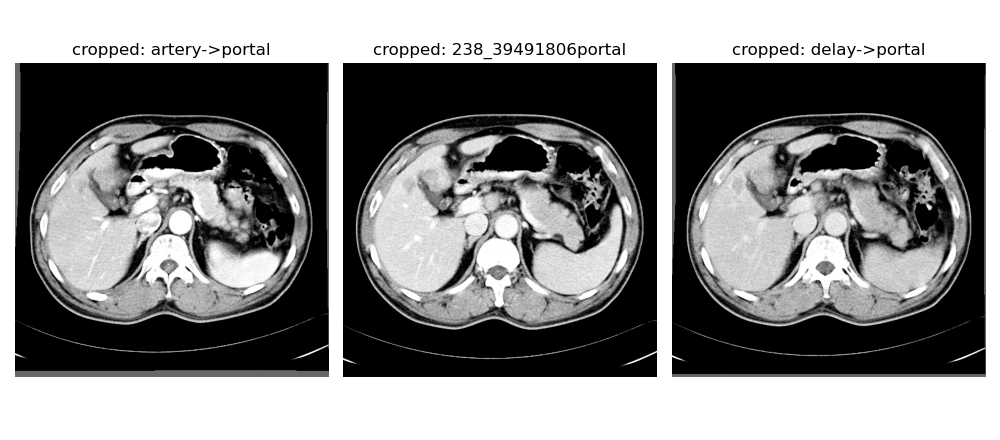

<IPython.core.display.Javascript object>


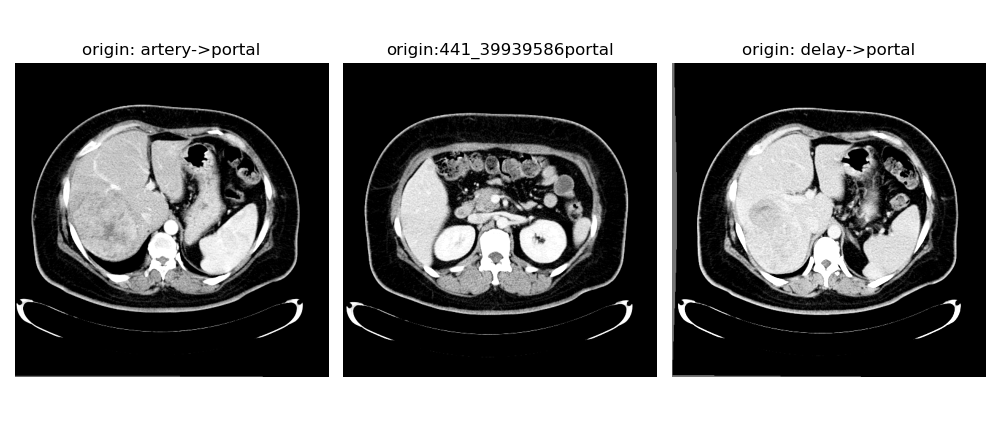

<IPython.core.display.Javascript object>


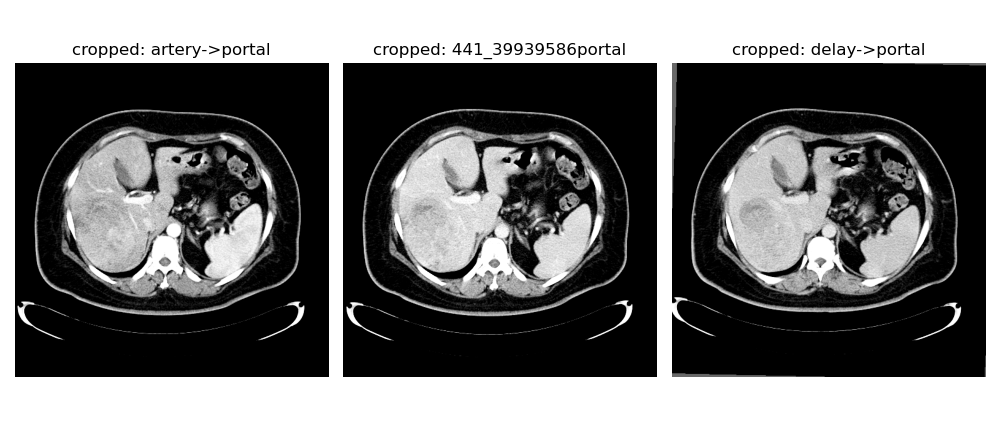

<IPython.core.display.Javascript object>


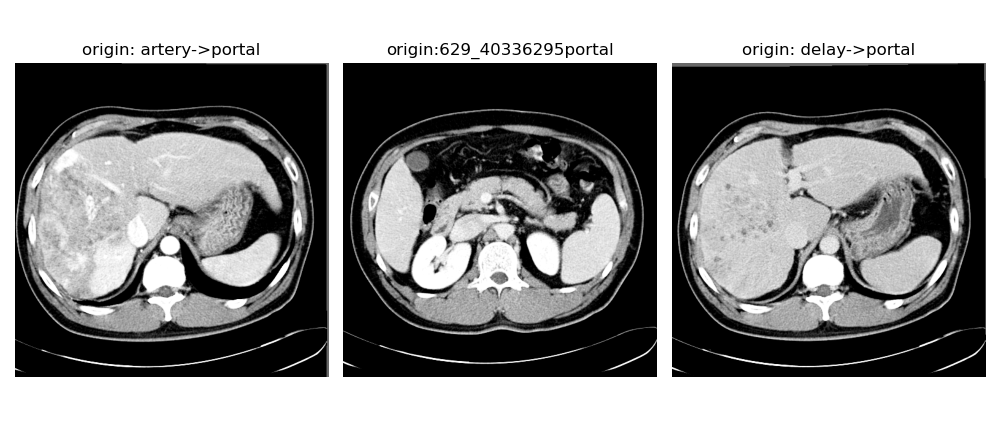

<IPython.core.display.Javascript object>


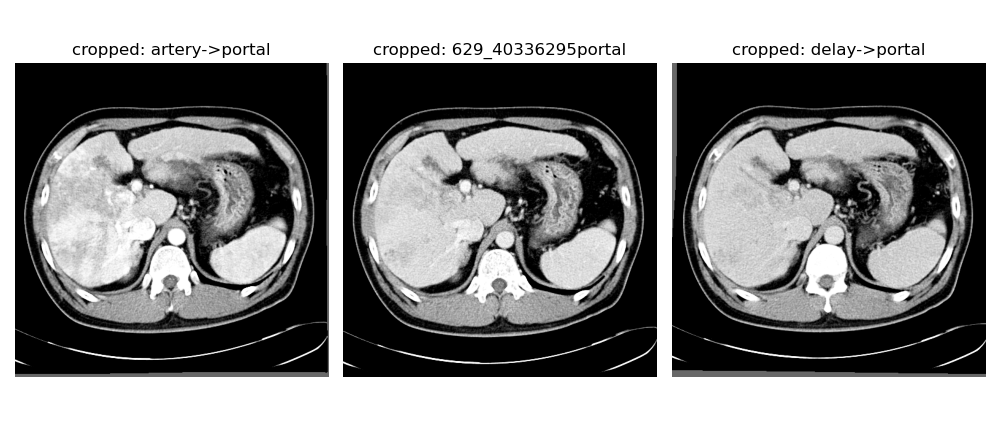

In [31]:
for i, sample in enumerate(samples) :
    
#     # origin
#     img_artery2portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/artery2portal/', 
#                                                               os.path.join(sample, 'result.1.mha'))),
#                                   sitk.sitkFloat32)
#     arr_artery2portal = sitk.GetArrayFromImage(img_artery2portal)
#     arr_artery2portal[arr_artery2portal>200] = 200
#     arr_artery2portal[arr_artery2portal<-100] = -100
#     img_artery2portal = sitk.GetImageFromArray(arr_artery2portal)
    
#     img_portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/portal/',
#                                                       sample+"_resize.hdr")), sitk.sitkFloat32)
#     arr_portal = sitk.GetArrayFromImage(img_portal)
#     arr_portal[arr_portal>200] = 200
#     arr_portal[arr_portal<-100] = -100
#     img_portal = sitk.GetImageFromArray(arr_portal)
    
#     img_delay2portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/delay2portal/', 
#                                                               os.path.join(sample, 'result.1.mha'))),
#                                   sitk.sitkFloat32)
#     arr_delay2portal = sitk.GetArrayFromImage(img_delay2portal)
#     arr_delay2portal[arr_delay2portal>200] = 200
#     arr_delay2portal[arr_delay2portal<-100] = -100
#     img_delay2portal = sitk.GetImageFromArray(arr_delay2portal)
    
#     gui.MultiImageDisplay(image_list = [img_artery2portal, img_portal, img_delay2portal],                   
#                          title_list = ['origin: artery->portal', 
#                                        'origin:' + sample+'portal', 'origin: delay->portal'], 
#                          figure_size=(10, 4.4))
    
    # croppped
    img_artery2portal = sitk.Cast(sitk.ReadImage(os.path.join('crop_outs/artery2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_artery2portal = sitk.GetArrayFromImage(img_artery2portal)
    arr_artery2portal[arr_artery2portal>200] = 200
    arr_artery2portal[arr_artery2portal<-100] = -100
    img_artery2portal = sitk.GetImageFromArray(arr_artery2portal)
    img_portal = sitk.Cast(sitk.ReadImage(os.path.join('crop_outs/portal/',
                                                      sample+"_onlyliver.hdr")), sitk.sitkFloat32)
    arr_portal = sitk.GetArrayFromImage(img_portal)
    arr_portal[arr_portal>200] = 200
    arr_portal[arr_portal<-100] = -100
    img_portal = sitk.GetImageFromArray(arr_portal)
    img_delay2portal = sitk.Cast(sitk.ReadImage(os.path.join('crop_outs/delay2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_delay2portal = sitk.GetArrayFromImage(img_delay2portal)
    arr_delay2portal[arr_delay2portal>200] = 200
    arr_delay2portal[arr_delay2portal<-100] = -100
    img_delay2portal = sitk.GetImageFromArray(arr_delay2portal)

    gui.MultiImageDisplay(image_list = [img_artery2portal, img_portal, img_delay2portal],                   
                         title_list = ['cropped: artery->portal', 
                                       'cropped: '+sample+'portal', 
                                       'cropped: delay->portal'], 
                         figure_size=(10, 4.4))

#### Composing RGB color images from the phase liver computer tomographical images which were cropped slices.

In [5]:
for i, sample in enumerate(samples) :
    img_artery2portal = sitk.Cast(sitk.ReadImage(os.path.join('samples_new_crop_outs/artery2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_artery2portal = sitk.GetArrayFromImage(img_artery2portal)
    arr_artery2portal[arr_artery2portal>200] = 200
    arr_artery2portal[arr_artery2portal<-100] = -100
    img_artery2portal = sitk.GetImageFromArray(arr_artery2portal)
    img_artery2portal = sitk.RescaleIntensity(img_artery2portal)
    img_artery2portal = sitk.Cast(img_artery2portal, sitk.sitkUInt8)
    
    img_portal = sitk.Cast(sitk.ReadImage(os.path.join('samples_new_crop_outs/portal/',
                                                      sample+"_onlyliver.hdr")), sitk.sitkFloat32)
    arr_portal = sitk.GetArrayFromImage(img_portal)
    arr_portal[arr_portal>200] = 200
    arr_portal[arr_portal<-100] = -100
    img_portal = sitk.GetImageFromArray(arr_portal)
    img_portal = sitk.RescaleIntensity(img_portal)
    img_portal = sitk.Cast(img_portal, sitk.sitkUInt8)
    
    img_delay2portal = sitk.Cast(sitk.ReadImage(os.path.join('samples_new_crop_outs/delay2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_delay2portal = sitk.GetArrayFromImage(img_delay2portal)
    arr_delay2portal[arr_delay2portal>200] = 200
    arr_delay2portal[arr_delay2portal<-100] = -100
    img_delay2portal = sitk.GetImageFromArray(arr_delay2portal)
    img_delay2portal = sitk.RescaleIntensity(img_delay2portal)
    img_delay2portal = sitk.Cast(img_delay2portal, sitk.sitkUInt8)

    cimg = sitk.Compose(img_artery2portal, img_portal, img_delay2portal)
    sitk.WriteImage(cimg, 'cropped_'+sample+"rgb.mha")

#### Composing RGB color images from the phase liver computer tomographical images.

In [35]:
for i, sample in enumerate(samples) :
    img_artery2portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/artery2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_artery2portal = sitk.GetArrayFromImage(img_artery2portal)
    arr_artery2portal[arr_artery2portal>200] = 200
    arr_artery2portal[arr_artery2portal<-100] = -100
    img_artery2portal = sitk.GetImageFromArray(arr_artery2portal)
    img_artery2portal = sitk.RescaleIntensity(img_artery2portal)
    img_artery2portal = sitk.Cast(img_artery2portal, sitk.sitkUInt8)
    
    img_portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/portal/',
                                                      sample+"_resize.hdr")), sitk.sitkFloat32)
    arr_portal = sitk.GetArrayFromImage(img_portal)
    arr_portal[arr_portal>200] = 200
    arr_portal[arr_portal<-100] = -100
    img_portal = sitk.GetImageFromArray(arr_portal)
    img_portal = sitk.RescaleIntensity(img_portal)
    img_portal = sitk.Cast(img_portal, sitk.sitkUInt8)
    
    img_delay2portal = sitk.Cast(sitk.ReadImage(os.path.join('outs/delay2portal/', 
                                                              os.path.join(sample, 'result.1.mha'))),
                                  sitk.sitkFloat32)
    arr_delay2portal = sitk.GetArrayFromImage(img_delay2portal)
    arr_delay2portal[arr_delay2portal>200] = 200
    arr_delay2portal[arr_delay2portal<-100] = -100
    img_delay2portal = sitk.GetImageFromArray(arr_delay2portal)
    img_delay2portal = sitk.RescaleIntensity(img_delay2portal)
    img_delay2portal = sitk.Cast(img_delay2portal, sitk.sitkUInt8)

    cimg = sitk.Compose(img_artery2portal, img_portal, img_delay2portal)
    sitk.WriteImage(cimg, sample+"rgb.mha")